In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


## part 1 (hist equalization)

In [3]:
def histEqualization(filename):
#     print(filename)
    im = cv2.imread(filename)
    
#     print(im)
#     plt.imshow(im)
#     cv2.waitKey(0)
    hist= np.histogram(im.flatten(),256,[0,256])

    cdf = hist[0].cumsum()
    cdf_normalized = cdf * hist[0].max()/ cdf.max()

    cdfm = np.ma.masked_equal(cdf,0)
    minf = cdfm.min()
    maxf = cdfm.max()
    cdfm = (cdfm - minf)*255/(maxf-minf)
    cdf1 = np.ma.filled(cdfm,0).astype('uint8')
    im2 = cdf1[im]
    
    s = np.amin(im)
    b = np.amax(im)
    
    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.plot(cdf_normalized, color = 'g')
    plt.hist(im.flatten(),b,[s,b], color = 'r')
    plt.xlim([s,b])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.subplot(2,1,2)
    plt.plot(cdfm, color = 'g')
    plt.hist(im2.flatten(),b,[s,b], color = 'r')
    plt.xlim([s,b])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()
    
    fig2 = plt.figure()
#     res = np.hstack((im,im2))
#     cv2.imshow('Original vs. Equalized',res)
#     cv2.waitKey(0)
    plt.subplot(1,2,1)
    plt.imshow(im, cmap='gray')
#     plt.imshow(im)
    plt.title("Original")
    plt.subplot(1,2,2)
#     plt.imshow(im2)
    plt.imshow(im2, cmap='gray')
    plt.title("Equalized")
    plt.show()
    return im2

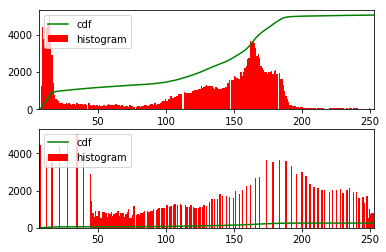

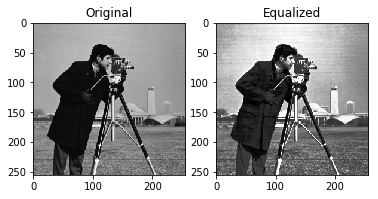

In [108]:
filename = "../input_data/cameraman.png"
# im = cv2.imread(filename)
_=histEqualization(filename)

## part 3 (hist matching)

In [4]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [5]:
def ecdf(x):
    vals, counts = np.unique(x, return_counts=True)
    ecdf = np.cumsum(counts).astype(np.float64)
    ecdf /= ecdf[-1]
    return vals, ecdf

In [6]:
def histMatching(originalIm,newIm,flag):
#     originalIm = cv2.imread(org)
#     newIm = cv2.imread(ref)
#     a = "lol"
#     print(type(a))
    if(isinstance(originalIm, str)):
        originalIm = cv2.imread(originalIm)
        newIm = cv2.imread(newIm)
    
    
    old = originalIm.shape
    original = originalIm.ravel()
    new = newIm.ravel()
    
    s = np.unique(original, return_inverse=True,return_counts=True)
    t = np.unique(new, return_counts=True)
    
    
    s_quantiles = np.cumsum(s[2]).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    t_quantiles = np.cumsum(t[1]).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
 
    source1 = np.around(s_quantiles*255)
    template1 = np.around(t_quantiles*255)
    
    b=[]
    for data in source1[:]:
        b.append(find_nearest_above(template1,data))
    b= np.array(b,dtype='uint8')
 
    ans = b[s[1]].reshape(old)
    
    
    
    
#     cv2.imshow("Original",originalIm)
#     cv2.imshow("Template",newIm)
#     cv2.imshow("Matched",np.array(ans,dtype='uint8'))

    if(flag == 1):
        

        fig = plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(cv2.cvtColor(originalIm, cv2.COLOR_BGR2RGB))
        plt.title("Original")
        plt.subplot(1,3,2)
        plt.imshow(cv2.cvtColor(newIm, cv2.COLOR_BGR2RGB))
        plt.title("Template")
        plt.subplot(1,3,3)
        plt.imshow(np.array(ans,dtype='uint8'))
        plt.title("Matched")
    #     plt.show()

        orgx, orgy = ecdf(original)
        newx, newy = ecdf(new)
        ansx, ansy = ecdf(ans.ravel())

        fig2 = plt.figure()
        plt.plot(orgx, orgy * 100, '-r', lw=3, label='Source')
        plt.plot(newx, newy * 100, '-k', lw=3, label='Template')
        plt.plot(ansx, ansy * 100, '--r', lw=3, label='Matched')
        plt.ylabel('Cumulative %')
        plt.xlim(orgx[0], orgx[-1]+10)
        plt.xlabel('Pixel value')
        plt.legend(loc=7)
#     plt.show()
    
#     print(type(ans))
    return np.array(ans,dtype='uint8')
        
    
    

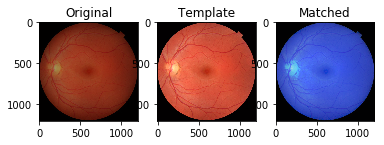

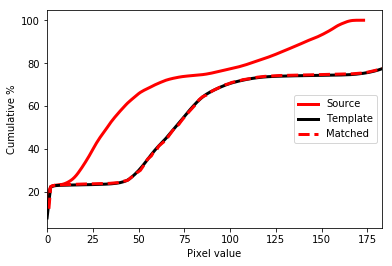

In [117]:
source = "../input_data/eye.png"
template = "../input_data/eyeref.png"

originalIm = cv2.imread(source)
newIm = cv2.imread(template)

_ = histMatching(originalIm,newIm,1)

## part 4

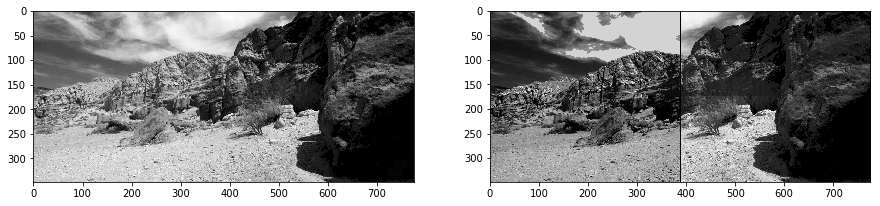

In [7]:
orig = cv2.imread("../input_data/canyon.png",0)
can1 = cv2.imread("../input_data/part1.png",0)
can2 = cv2.imread("../input_data/part2.png",0)
can3 = cv2.imread("../input_data/part3.png",0)
can4 = cv2.imread("../input_data/part4.png",0)
h, w = orig.shape
# print(h)
# print(w)
h2 = int(h/2)
w2 = int(w/2)
quad1 = orig[0:174, 0:388]
quad2 = orig[0:174, 389:775]
quad3 = orig[175:348, 0:388]
quad4 = orig[175:348, 389:775]

# plt.imshow(quad4,'gray')

# new1 = histMatching(quad1,can1,0)
# # new1 = np.array(new1,dtype='uint8')
# new2 = histMatching(quad2,can2,0)
# # new2 = np.array(new2,dtype='uint8')
# new3 = histMatching(quad3,can3,0)
# # new3 = np.array(new3,dtype='uint8')
# new4 = histMatching(quad4,can4,0)
# new4 = np.array(new4,dtype='uint8')
# fig2 = plt.figure()
# plt.imshow(new1,'gray')
new1 = histMatching(can1,quad1,0)
new2 = histMatching(can2,quad2,0)
new3 = histMatching(can3,quad3,0)
new4 = histMatching(can4,quad4,0)

final = np.zeros((h+1,w+1), dtype='uint8')

final[0:174, 0:388] = new1
final[0:174, 389:776] = new2
final[175:349, 0:388] = new3
final[175:349, 389:776] = new4


fig = plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(orig,'gray')
plt.subplot(1,2,2)
plt.imshow(final,'gray')
plt.show()
